In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds 

In [5]:
# get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVQIXSV/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVQIXSV/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVQIXSV/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# Single layer LSTM

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # Bidirectional allos the cell goes in both ways
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 70s 155ms/step - loss: 0.6066 - accuracy: 0.6466 - val_loss: 0.5096 - val_accuracy: 0.7928
Epoch 2/10
391/391 [==============================] - 60s 153ms/step - loss: 0.3833 - accuracy: 0.8442 - val_loss: 0.4086 - val_accuracy: 0.8237
Epoch 3/10
391/391 [==============================] - 60s 152ms/step - loss: 0.2904 - accuracy: 0.8882 - val_loss: 0.5163 - val_accuracy: 0.8406
Epoch 4/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2620 - accuracy: 0.9014 - val_loss: 0.4152 - val_accuracy: 0.8351
Epoch 5/10
391/391 [==============================] - 60s 153ms/step - loss: 0.1772 - accuracy: 0.9382 - val_loss: 0.4582 - val_accuracy: 0.8228
Epoch 6/10
391/391 [==============================] - 60s 152ms/step - loss: 0.1497 - accuracy: 0.9480 - val_loss: 0.5373 - val_accuracy: 0.8212
Epoch 7/10
391/391 [==============================] - 60s 152ms/step - loss: 0.1190 - accuracy: 0.9596 - val_loss: 0.5863 - val_ac

In [17]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

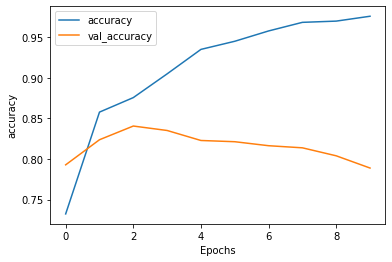

In [18]:
plot_graph(history, 'accuracy')

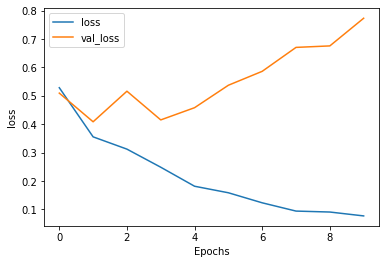

In [19]:
plot_graph(history, 'loss')

# Multiple layer LSTM

In [22]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 114s 281ms/step - loss: 0.6281 - accuracy: 0.6281 - val_loss: 0.6124 - val_accuracy: 0.7100
Epoch 2/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5401 - accuracy: 0.7348 - val_loss: 0.4486 - val_accuracy: 0.8104
Epoch 3/10
391/391 [==============================] - 109s 278ms/step - loss: 0.3368 - accuracy: 0.8674 - val_loss: 0.3638 - val_accuracy: 0.8423
Epoch 4/10
391/391 [==============================] - 106s 271ms/step - loss: 0.2368 - accuracy: 0.9110 - val_loss: 0.3690 - val_accuracy: 0.8492
Epoch 5/10
391/391 [==============================] - 105s 268ms/step - loss: 0.1783 - accuracy: 0.9376 - val_loss: 0.3636 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 106s 270ms/step - loss: 0.1281 - accuracy: 0.9578 - val_loss: 0.3677 - val_accuracy: 0.8702
Epoch 7/10
391/391 [==============================] - 105s 268ms/step - loss: 0.0904 - accuracy: 0.9728 - val_loss: 0.4430 -

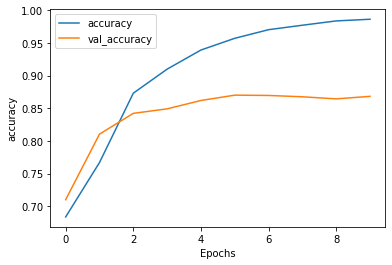

In [24]:
plot_graph(history, 'accuracy')

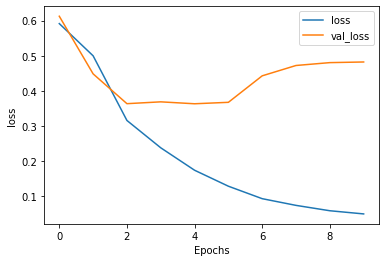

In [25]:
plot_graph(history, 'loss')